In [1]:
%matplotlib widget
import numpy as np
from scipy import interpolate
from matplotlib import pyplot as plt



In [2]:
N = 5
x = np.random.uniform(low=23,high=25,size=N)
x.sort()
y = np.random.uniform(low=23,high=25,size=N)

# append the starting x,y coordinates
x = np.r_[x, x[0]]
y = np.r_[y, y[0]]

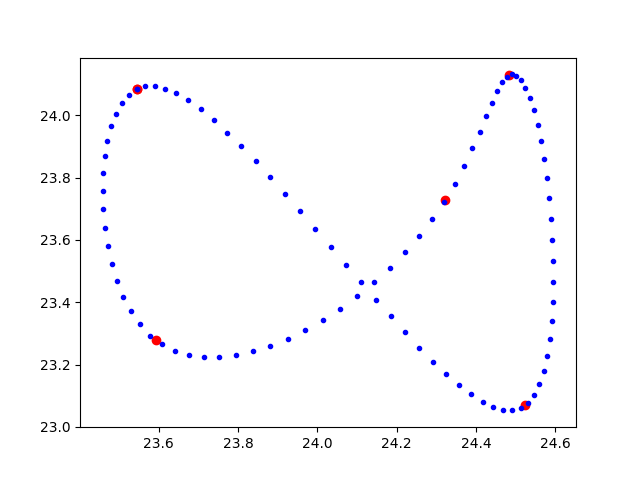

In [3]:





# fit splines to x=f(u) and y=g(u), treating both as periodic. also note that s=0
# is needed in order to force the spline fit to pass through all the input points.
tck, u = interpolate.splprep([x, y], u=None, s=0.0, per=True)

# evaluate the spline fits for 1000 evenly spaced distance values
xi, yi = interpolate.splev(np.linspace(0, 1, 100), tck)

# plot the result
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'or')
ax.plot(xi, yi, '.b')

In [4]:
x

array([23.54366092, 23.59344113, 24.32257648, 24.48347015, 24.52318788,
       23.54366092])

In [5]:
y

array([24.08394144, 23.2772857 , 23.72883187, 24.12824996, 23.06866095,
       24.08394144])

In [6]:
from sympy import Point, Polygon

ModuleNotFoundError: No module named 'sympy'

In [7]:
# creating points using Point()
pnts = []

N = 3
x = np.random.uniform(low=23,high=25,size=N)
y = np.random.uniform(low=23,high=25,size=N)


# append the starting x,y coordinates
x = np.r_[x, x[0]]
y = np.r_[y, y[0]]

for xi, yi in zip(x,y):
    pnts.append(Point(xi, yi))

# creating polygon using Polygon()
isConvex = Polygon(*pnts)
  
# using is_convex()
print(isConvex.is_convex())

tck, u = interpolate.splprep([x, y], u=None, s=0.0, per=True)

# evaluate the spline fits for 1000 evenly spaced distance values
xi, yi = interpolate.splev(np.linspace(0, 1, 100), tck)

# plot the result
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'or')
ax.plot(xi, yi, '.b')

NameError: name 'Point' is not defined

In [8]:
def spline(p0, p1, p0l, p1l, npoints = 100, t=None):
    """ retorna um conjunto de pontos que compõem um spline, componente x: fx e componente y: fy
    """  
    if t is None:
        t = np.linspace(0,1,npoints)

    f1 = 2*t**3 -3*t**2 + 1
    f2 = -2*t**3 + 3*t**2
    f3 = t**3 -2*t**2 + t
    f4 = t**3 - t**2    

    fx = p0[0]*f1 + p1[0]*f2 + p0l[0]*f3 + p1l[0]*f4
    fy = p0[1]*f1 + p1[1]*f2 + p0l[1]*f3 + p1l[1]*f4
    fz = p0[2]*f1 + p1[2]*f2 + p0l[2]*f3 + p1l[2]*f4

    return fx, fy, fz

In [9]:
pnts = []

N = 4
x = np.random.uniform(low=23,high=25,size=N)
y = np.random.uniform(low=23,high=25,size=N)
z = 0*np.random.uniform(low=23,high=25,size=N)


# append the starting x,y coordinates
# x = np.r_[x, x[0]]
# y = np.r_[y, y[0]]

for xi, yi,zi in zip(x,y,z):
    pnts.append([xi, yi,zi])

In [10]:
pnts = [[-1.0,0.0,0.0], [1., 0., 1.],[1.0, .0,.0], [-1., 0., 0.]]

In [11]:
fx, fy, fz = spline(pnts[0], pnts[1], pnts[2], pnts[3], npoints=150)
fx2, fy2, fz2 = spline(pnts[1], pnts[0], pnts[3], pnts[2], npoints=150)

(0.0, 1.0)

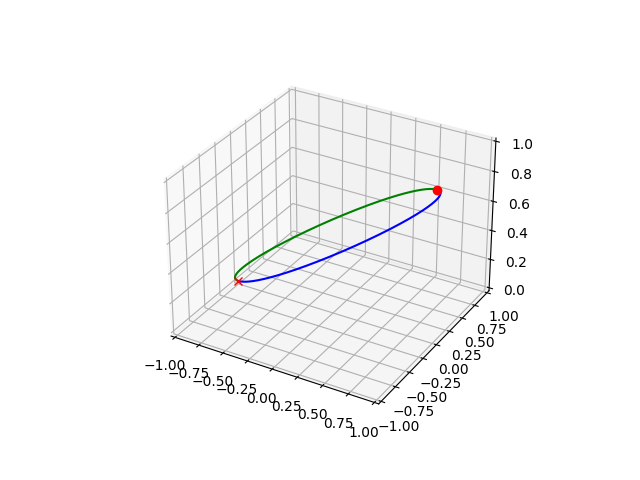

In [12]:
from numpy import size


ax = plt.figure().add_subplot(projection='3d')

# Plot a sin curve using the x and y axes.
# x = np.linspace(0, 1, 100)
# y = np.sin(x * 2 * np.pi) / 2 + 0.5


ax.plot(fx, fy, fz, '-b')
ax.plot(fx2, fy2, fz2, '-g')
# ax.plot(fx[0],fy[0],fz[0], 'xr')
ax.plot(pnts[0][0],pnts[0][1],pnts[0][2], 'xr')
ax.plot(pnts[1][0],pnts[1][1],pnts[1][2], 'or')
# ax.quiver(pnts[0][0],pnts[0][1],pnts[0][2],pnts[2][0],pnts[2][1],pnts[2][2])
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(0,1)


In [13]:
def compute_field(C, p=np.array([0., 0., 0.]).T, s=np.linspace(-1,1,5),Kf=10, eta=1, P=1):
    # Compute minimum distance
    m = np.sqrt(np.sum((p.reshape((3,1))*(np.ones((1,len(C.T)))) -C)**2, axis=0))
    # print(m)
    D = np.min(m)
    k_min = np.argmin(m)
    # print(k_min)
    # Compute parameter of the closest point
    s_star = C.T[k_min]
    # Compute closest point
    p_star = C[:,k_min]

    # Compute distance vector
    D_vec = p-p_star

    # %Compute gradient of the distance function
    grad_D = D_vec/(D+1e-6)

    # %Compute tangent vector
    
    T = -C[:,k_min-1] + C[:,k_min]
    T = T/np.linalg.norm(T)

    # %Compute "modulation" functions
    G = -(2/np.pi)*np.arctan(Kf*D)
    H = np.sqrt(1-G*G)

    # Compute field
    F = eta*(G*grad_D + H*T)

    return F

In [14]:
curve = []
for xi, yi, zi in zip(fx,fy,fz):
   curve.append([xi,yi,zi]) 

for xi, yi, zi in zip(fx2,fy2,fz2):
   curve.append([xi,yi,zi]) 


curve = np.array(curve).T

In [17]:
curve.shape

(3, 300)

In [15]:

N = 15
l = [-1,1,-1,1,-1,1]
x = np.linspace(-1,1,N)
y = np.linspace(-1,1,N)
z = np.linspace(-1,1,N)

X = []
Y = []
Z = []
VX = []
VY = []
VZ = []
for xi in x:
    for yi in y:
        for zi in z:
            F = compute_field(curve, p=np.array([xi, yi, zi]).T, Kf=10, eta=1)
            # F = F/(np.linalg.norm(F)+1e-18)
            X.append(xi)
            Y.append(yi)
            Z.append(zi)
            VX.append(F[0])
            VY.append(F[1])
            VZ.append(F[2])

/tmp/ipykernel_11407/1587880169.py:22: RuntimeWarning: invalid value encountered in divide
  T = T/np.linalg.norm(T)


Text(0.5, 0.5, '$\\vec{F}$')

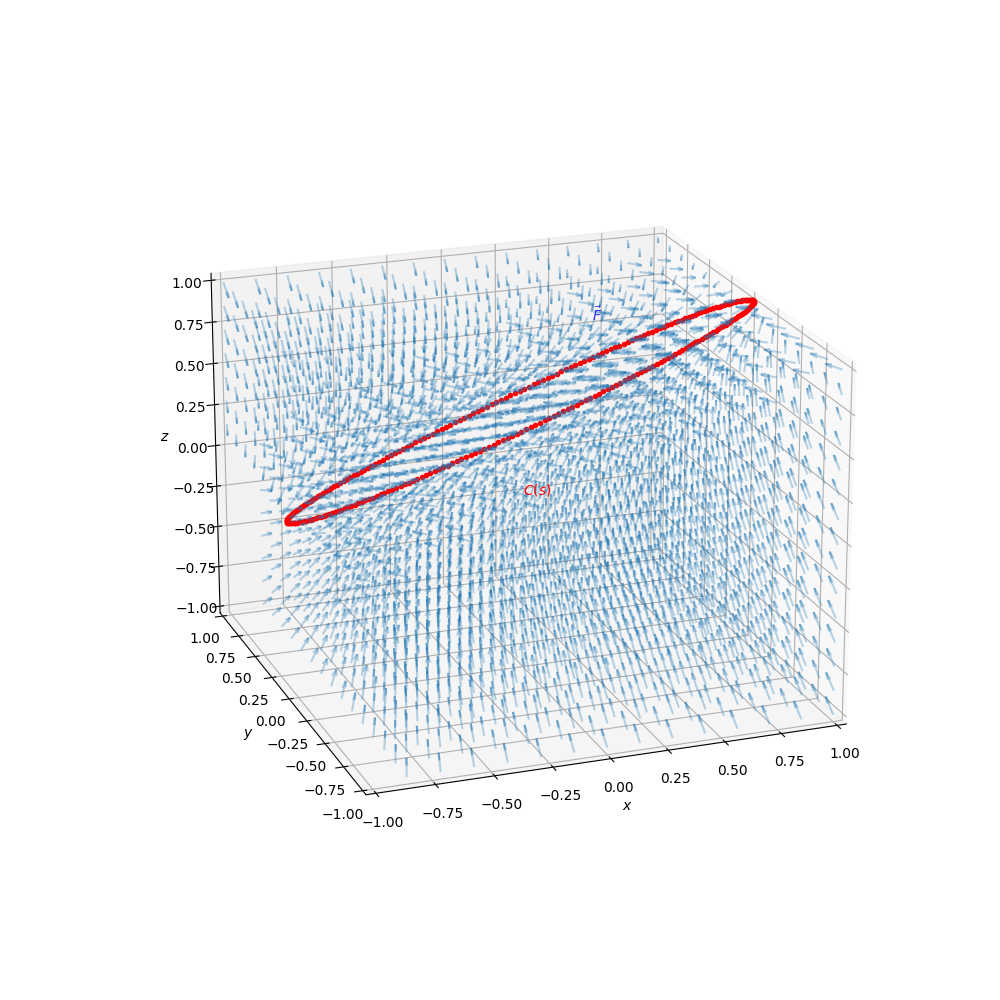

In [16]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,  projection='3d')
ax.quiver(X, Y, Z, VX, VY, VZ, arrow_length_ratio=0.4, alpha=0.3,  length=.1, normalize=True)


for fx, fy, fz in curve.T:
    ax.plot(fx, fy, fz, '.r')

# ax.plot(fx, fy, fz, '-b')
# ax.plot(fx2, fy2, fz2, '-g')

ax.view_init(20,-110)
ax.set_xlim(l[0],l[1])
ax.set_ylim(l[2],l[3])
ax.set_zlim(l[4],l[5])

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_zlabel(r'$z$')
ax.text(0,0,0, r'$C(s)$', c='red')
ax.text(0.5,0.5,0.75, r'$\vec{F}$', c='blue', alpha=0.8)
